In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.shape

(400, 9)

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
a = df.loc[df['Chance of Admit '] >= 0.80, 'Chance of Admit '] = 1
b = df.loc[df['Chance of Admit '] < 0.80, 'Chance of Admit '] = 0

In [9]:
a

1

In [10]:
b

0

In [11]:
from sklearn.preprocessing import Binarizer

In [12]:
bi = Binarizer(threshold = 0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [16]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [17]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [18]:
y

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [19]:
y = y.astype('int')

In [20]:
y

0      1
1      0
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

<Axes: xlabel='Chance of Admit ', ylabel='count'>

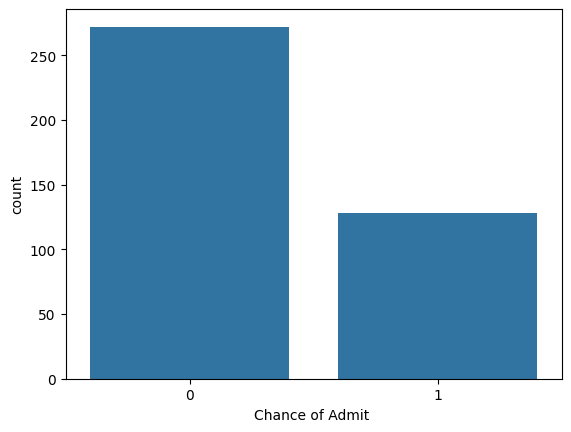

In [21]:
sns.countplot(x = y)

In [22]:
y.value_counts()

Chance of Admit 
0    272
1    128
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
x_train.shape

(300, 8)

In [27]:
x_test.shape

(100, 8)

In [28]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
classifier = DecisionTreeClassifier(random_state = 0)

In [31]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

In [35]:
result

,actual,predicted
132,0,0
309,0,0
341,0,1
196,0,0
246,0,0
...,...,...
146,0,0
135,1,0
390,0,0
264,0,0


In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

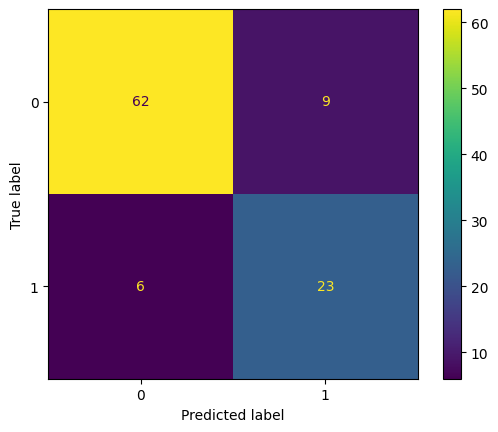

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [44]:
accuracy_score(y_test, y_pred)

0.85

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        71
           1       0.72      0.79      0.75        29

    accuracy                           0.85       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.86      0.85      0.85       100



In [46]:
from sklearn.tree import plot_tree

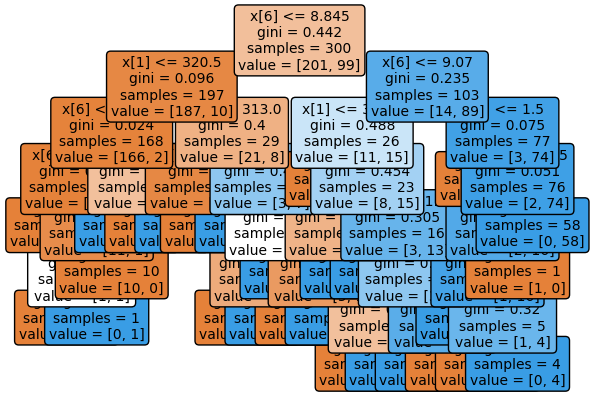

In [48]:
plot_tree(classifier, fontsize = 10, filled = True, rounded = True);

In [49]:
import matplotlib.pyplot as plt

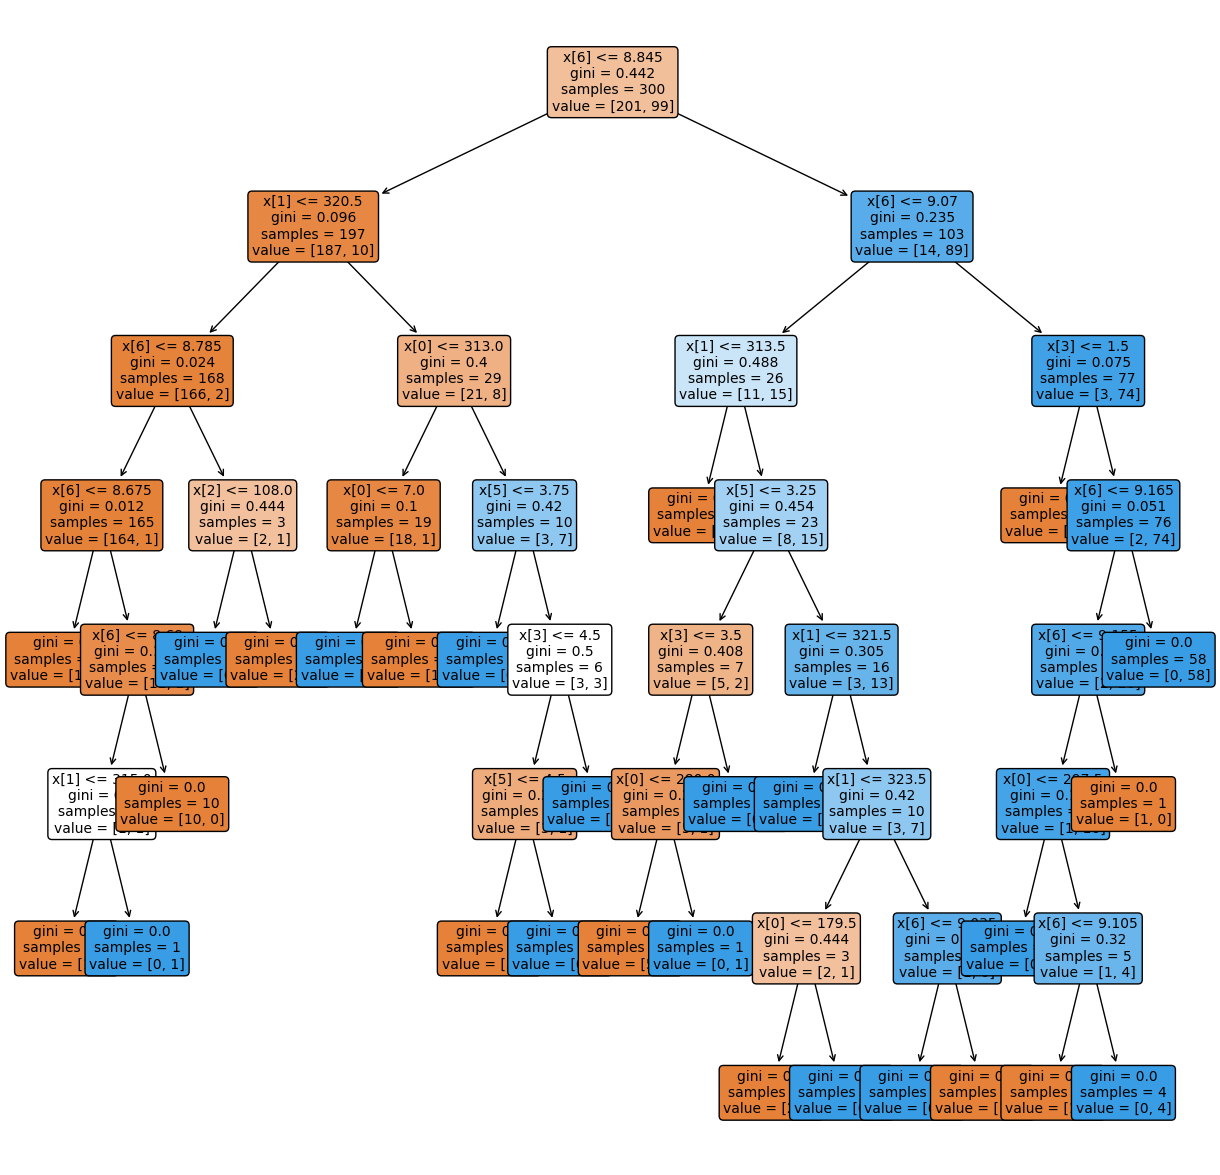

In [51]:
plt.figure(figsize = (15, 15))
plot_tree(classifier, fontsize = 10, filled = True, rounded = True);